In [1]:
# %matplotlib widget
import soundfile as sf
from espnet2.asr.frontend.default import DefaultFrontend
from espnet2.asr.specaug.specaug import SpecAug
import torch
from IPython import display
import matplotlib.pyplot as plt
import librosa.display
import numpy as np


In [2]:
def show_spectrogram(sound, rate, frontend, specaug=None):
    sound_tensor = torch.tensor(sound, dtype=torch.float)
    input_tensor = sound_tensor.unsqueeze(0)
    input_lengths = torch.tensor([input_tensor.shape[1]], dtype=torch.long)
    output, output_lengths = frontend(input_tensor, input_lengths)
    if specaug is not None:
        print(output.shape, flush=True)
        output, output_lengths = specaug(output, output_lengths)
        print(output.shape, flush=True)
    # matplotlibでスペクトログラム（output）を可視化．カラーマップを青系にする
    # 波形データをスペクトログラムの下に表示

    output_numpy = output[0].numpy()
    output_numpy = output_numpy.T
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 7))
    librosa.display.specshow(output_numpy, ax=ax[0], y_axis="mel", cmap="gray")
    # ax[0].imshow(output_numpy, aspect="auto", origin="lower", cmap="Blues")
    ax[1].plot(sound)

    # ax[1]を 1/4 の高さにする
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0 + box.height * 0.8, box.width, box.height * 0.2])
    ax[1].set_xlabel("Time [sec]")
    ax[1].set_ylabel("Amplitude")
    ax[1].set_title("Waveform")
    ax[1].set_xlim([0, len(sound)])
    ax[1].set_ylim([-1, 1])

    # ax[0]を 3/4 の高さにする
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width, box.height * 0.75])
    ax[0].set_xlabel("Time [sec]")
    ax[0].set_ylabel("Frequency [Hz]")
    ax[0].set_title("Spectrogram")
    # ax[0].set_xlim([0, len(sound)])
    ax[0].set_ylim([0, 8000])
    plt.show()

    display.display(display.Audio(sound, rate=rate))
    
    return output, output_lengths

torch.Size([1, 1005, 160])
torch.Size([1, 1005, 160])


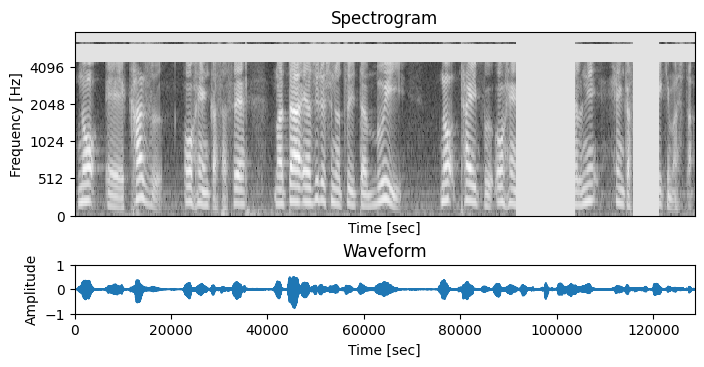

(tensor([[[-11.1822, -10.4831, -13.5195,  ..., -16.4034, -16.4049, -16.8050],
          [ -7.7693,  -7.0702,  -7.2401,  ..., -17.8696, -18.6725, -19.1933],
          [ -6.6734,  -5.9744,  -7.9456,  ..., -17.1874, -20.4420, -21.8269],
          ...,
          [ -6.3154,  -5.6163,  -6.6953,  ..., -18.9403, -19.5968, -21.3481],
          [ -5.6127,  -4.9137,  -5.9215,  ..., -19.4734, -20.5512, -21.3926],
          [ -8.0537,  -7.3546,  -6.7071,  ..., -17.0189, -17.4700, -18.0565]]]),
 tensor([1005]))

In [24]:
frontend = DefaultFrontend(fs=16000, n_fft=512, hop_length=128, win_length=400, n_mels=160)
specaug = SpecAug(time_mask_width_ratio_range=(0.0, 0.1), apply_time_warp=True, time_warp_window=5)
# sound, rate = sf.read("../../soundfiles/A01M0007_0219718_0221640.flac")
sound, rate = sf.read("../../soundfiles/A01M0048_0256028_0264062.flac")
show_spectrogram(sound, rate, frontend, specaug)

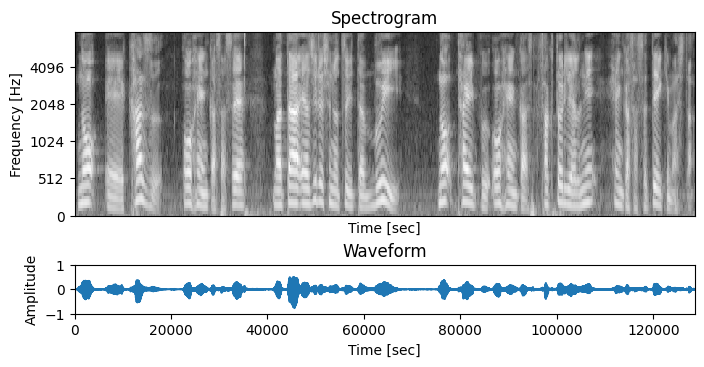

(tensor([[[-10.9140, -13.5092,  -8.0768,  ..., -15.8649, -16.1381, -16.5033],
          [ -7.2078,  -7.3338,  -7.1372,  ..., -15.6091, -16.8200, -18.5318],
          [ -6.3750,  -8.6084,  -9.3386,  ..., -15.7761, -16.2036, -18.5612],
          ...,
          [ -5.8932,  -7.3113,  -8.4992,  ..., -15.9890, -17.4668, -19.6266],
          [ -5.2670,  -6.5093,  -8.9472,  ..., -15.3035, -16.9957, -20.2752],
          [ -7.2715,  -7.2731,  -9.1919,  ..., -16.6240, -17.2656, -17.4334]]]),
 tensor([1005]))

In [4]:
frontend = DefaultFrontend(fs=16000, n_fft=512, hop_length=128, win_length=400, n_mels=80)
show_spectrogram(sound, rate, frontend)

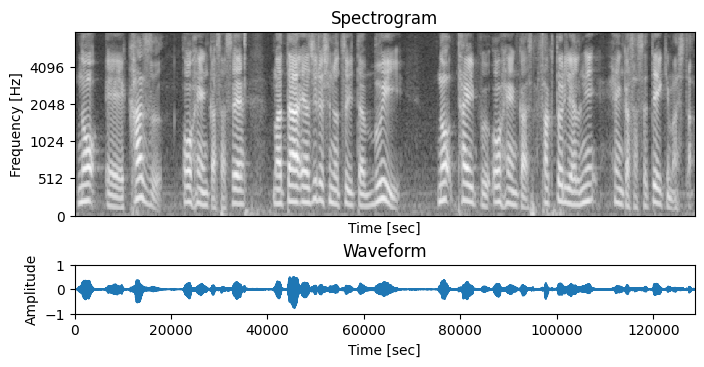

(tensor([[[ -6.8835,  -5.9125,  -7.1004,  ..., -15.5707, -15.6898, -16.1149],
          [ -5.2765,  -5.6045,  -6.6395,  ..., -15.7571, -16.1955, -16.6349],
          [ -4.6235,  -5.2456,  -6.9872,  ..., -16.0135, -17.8508, -18.4759],
          ...,
          [ -3.9792,  -4.1864,  -5.4001,  ..., -17.1003, -18.2926, -19.6039],
          [ -3.9874,  -4.0839,  -4.8404,  ..., -16.7406, -17.3034, -17.9771],
          [ -5.1539,  -4.3196,  -4.5939,  ..., -16.1360, -16.6421, -17.2370]]]),
 tensor([1005]))

In [5]:
frontend = DefaultFrontend(fs=16000, n_fft=1024, hop_length=128, win_length=800, n_mels=160)
show_spectrogram(sound, rate, frontend)

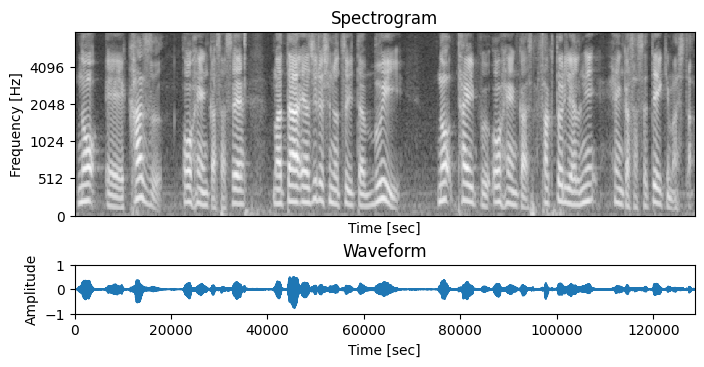

In [6]:
frontend = DefaultFrontend(fs=16000, n_fft=1024, hop_length=128, win_length=800, n_mels=160)
output, output_lengths = show_spectrogram(sound, rate, frontend)

In [7]:
from espnet2.tts.feats_extract.dio import Dio 

In [8]:
dio = Dio(fs=16000, n_fft=1024, hop_length=128, use_token_averaged_f0=False, use_continuous_f0=False, use_log_f0=True)

In [9]:
input_tensor = torch.tensor(sound, dtype=torch.float)
input_tensor = input_tensor.unsqueeze(0)
input_lengths = torch.tensor([input_tensor.shape[1]], dtype=torch.long)


In [10]:
f0, f0_lengths = dio(input_tensor, input_lengths)

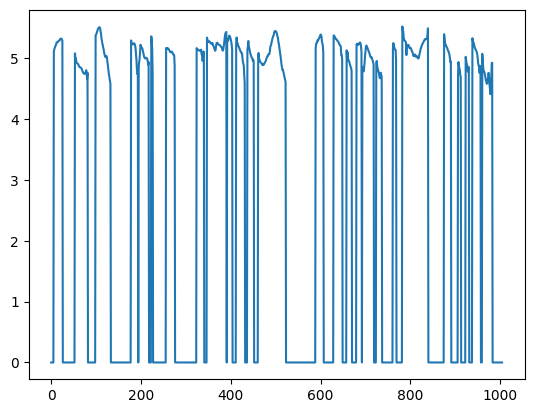

In [11]:
plt.plot(f0[0].squeeze(1))

In [12]:
from espnet2.asr.encoder.conformer_encoder import ConformerEncoder

In [13]:
encoder = ConformerEncoder(input_size=output.shape[-1])

In [14]:
encoder_output, encoder_output_lengths, _ = encoder(output, output_lengths)

In [15]:
print(output.shape)
print(f0.shape)
print(encoder_output.shape)

torch.Size([1, 1005, 160])
torch.Size([1, 1005, 1])
torch.Size([1, 250, 256])


In [16]:
f0s = f0.squeeze(0, 2)
# f0sのサイズが4の倍数になるようにpadする
if f0s.shape[0] % 4 != 0:
    pad = 4 - f0s.shape[0] % 4
    f0s = torch.cat([f0s, torch.zeros(pad,)], dim=0)

In [17]:
f0s4 = f0s.reshape(-1, 4)
# 4つの値のうち，中央2つの平均値を計算する．
# ただし0は平均の計算に含めない．また，2つの値が両方とも0の場合は0を出力する．
f0p = f0s4[:, 1:3].clone()
f0p[f0p == 0] = float("nan")
f0p = torch.nanmean(f0p, dim=1)
f0p = torch.where(torch.isnan(f0p), torch.zeros_like(f0p), f0p)

In [18]:
# f0s4の4つの値を用いて最小自乗誤差法で傾きを計算する
# ただし，0の値は計算に含めない
# 3つ以上の値が0の場合は傾きは0とする
f0dy = f0s4.clone()
# f0dy[f0dy == 0] = float("nan")
f0dx = np.arange(f0dy.shape[1]) - (f0dy.shape[1]-1) / 2

In [19]:
f0ds = []
for i in range(f0dy.shape[0]):
    # fd0y[i]に含まれる0より大きい値の数を数える
    nonzero_count = torch.sum(f0dy[i] > 0)
    if nonzero_count > 2:
        dx = f0dx[f0dy[i] > 0]
        dy = f0dy[i][f0dy[i] > 0]
        # 傾きを計算する
        f0ds.append(np.polyfit(dx, dy, 1))
    else:
        f0ds.append([0.0, 0.0])
f0ds = np.stack(f0ds)
    

In [20]:
np.concatenate([f0p.unsqueeze(-1), f0ds], axis=1)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.11331511e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.19866657e+00,  1.71550274e-02,  5.19592512e+00],
       [ 5.26025772e+00,  4.15906906e-03,  5.25962353e+00],
       [ 5.28478622e+00,  4.45971489e-03,  5.28479826e+00],
       [ 5.31852722e+00,  2.52637863e-03,  5.31640172e+00],
       [ 5.28331184e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.04431486e+00, -3.96020412e-02,  5.04885010e+00],
       [ 4.91803455e+00, -9.92693901e-03,  4.92195356e+00],
       [ 4.87714386e+00, -1.56516552e-02,  4.87753737e+00],
       [ 4.84436226e+00, -3.85975838e-03

In [21]:
x = (np.arange(f0ds.shape[0]) * f0s4.shape[1] + (f0s4.shape[1]-1) / 2) * 8

/tmp/ipykernel_4160434/2493213514.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, f0ds[:, 1], 'ko', color='none', markeredgecolor='k')


(4.0, 6.0)

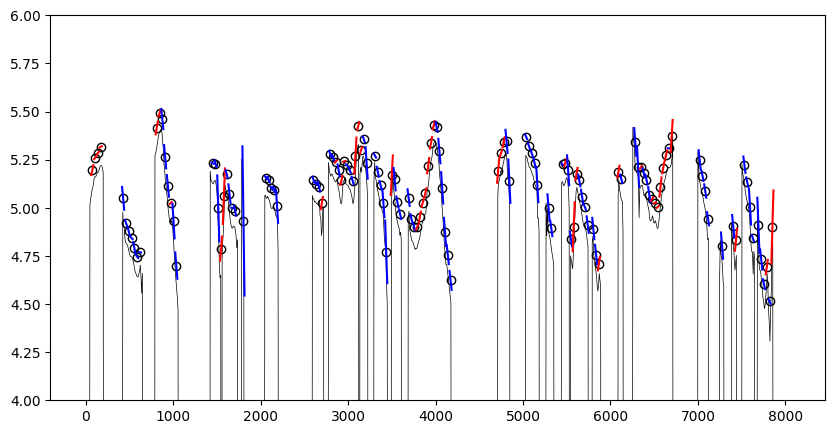

In [22]:
plt.figure(figsize=(10, 5))
f0sx = np.arange(f0s.shape[0]) * 8
plt.plot(f0sx, f0s - 0.1, 'k-', linewidth=0.5)
plt.plot(x, f0ds[:, 1], 'ko', color='none', markeredgecolor='k')
for i in range(f0ds.shape[0]):
    xx = [x[i] - 1.5 * 8, x[i] + 1.5 * 8]
    yy = [f0ds[i, 1] - 1.5*f0ds[i, 0], f0ds[i, 1] + 1.5*f0ds[i, 0]]
    if f0ds[i, 0] >= 0:
        c = 'r'
    else:
        c = 'b'
    plt.plot(xx, yy, c + '-')
plt.ylim(4, 6)